In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [8]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [9]:
numerical_features = df.select_dtypes(include=np.number)

# Using the IQR method to identify outliers
def identify_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

outliers_dict = {}
for column in numerical_features.columns:
  outliers = identify_outliers_iqr(numerical_features[column])
  if not outliers.empty:
    outliers_dict[column] = outliers

# Print the outliers for each feature
for feature, outliers in outliers_dict.items():
  print(f"Outliers in {feature}:")
  print(outliers)
  print("-" * 20)

Outliers in Years at Company:
465      48
662      49
843      49
1373     48
1567     48
         ..
58676    48
58800    48
58949    50
59385    50
59577    49
Name: Years at Company, Length: 273, dtype: int64
--------------------
Outliers in Monthly Income:
387      15495
1776     13961
3521     14014
3609     14016
8346     14176
8575     13962
8809     14276
10962    14066
13184    13876
14374    14421
15379    13959
15898    13722
16767    13747
17533    13768
18775    14622
20818    13739
22149    14163
22769    16149
25120    13833
25244    14271
25341    14235
25948    13800
26713    14226
28823    13988
30535    14147
35324    14286
35789    14885
36090    13859
36772    14396
39043    14210
39086    13715
39504    14127
39728    13793
39740    14002
40109    14185
40520    14076
40777    14067
43189    13875
43411    14398
43690    14137
43730    14103
47071    14924
47255    13728
50707    14405
51950    13877
53324    15464
55722    15552
56848    14839
56969    14406
5752

#**EDA**
---

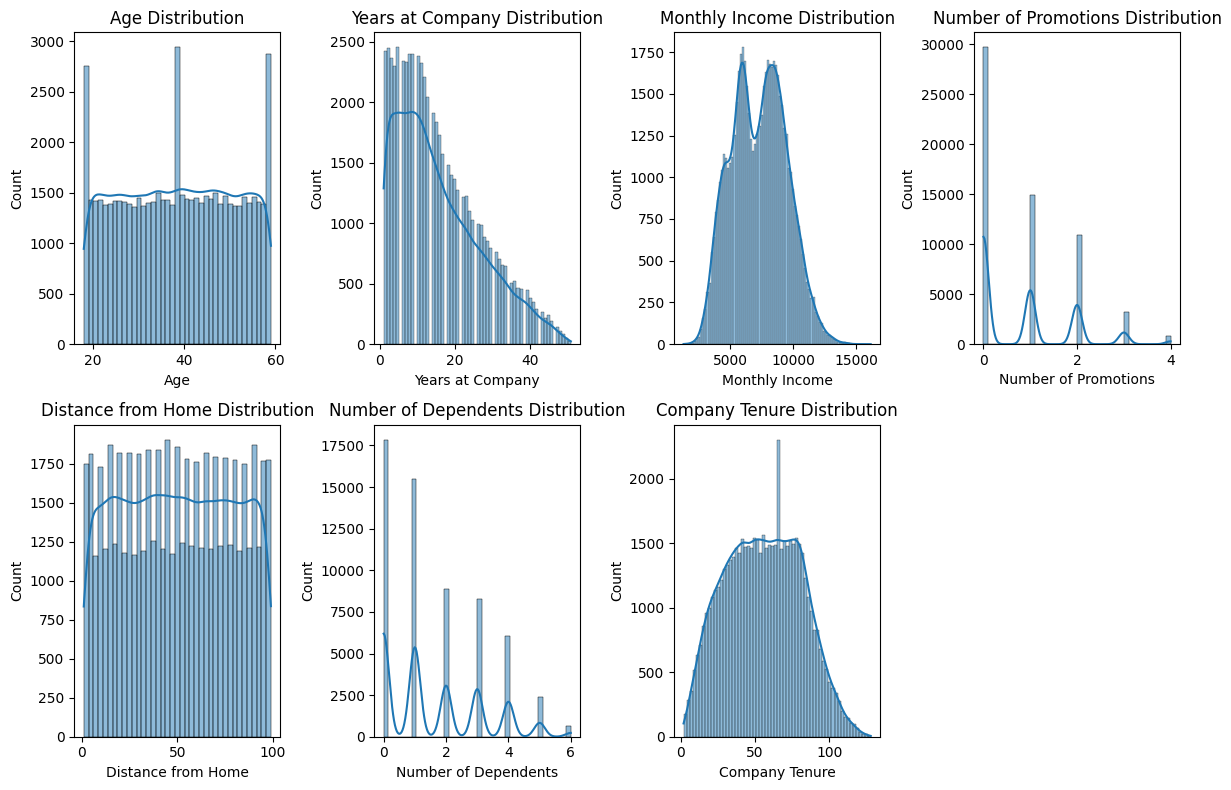

In [12]:

# Visualize the distribution of numerical columns
numerical_cols = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
                  'Distance from Home', 'Number of Dependents', 'Company Tenure']
# Create histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

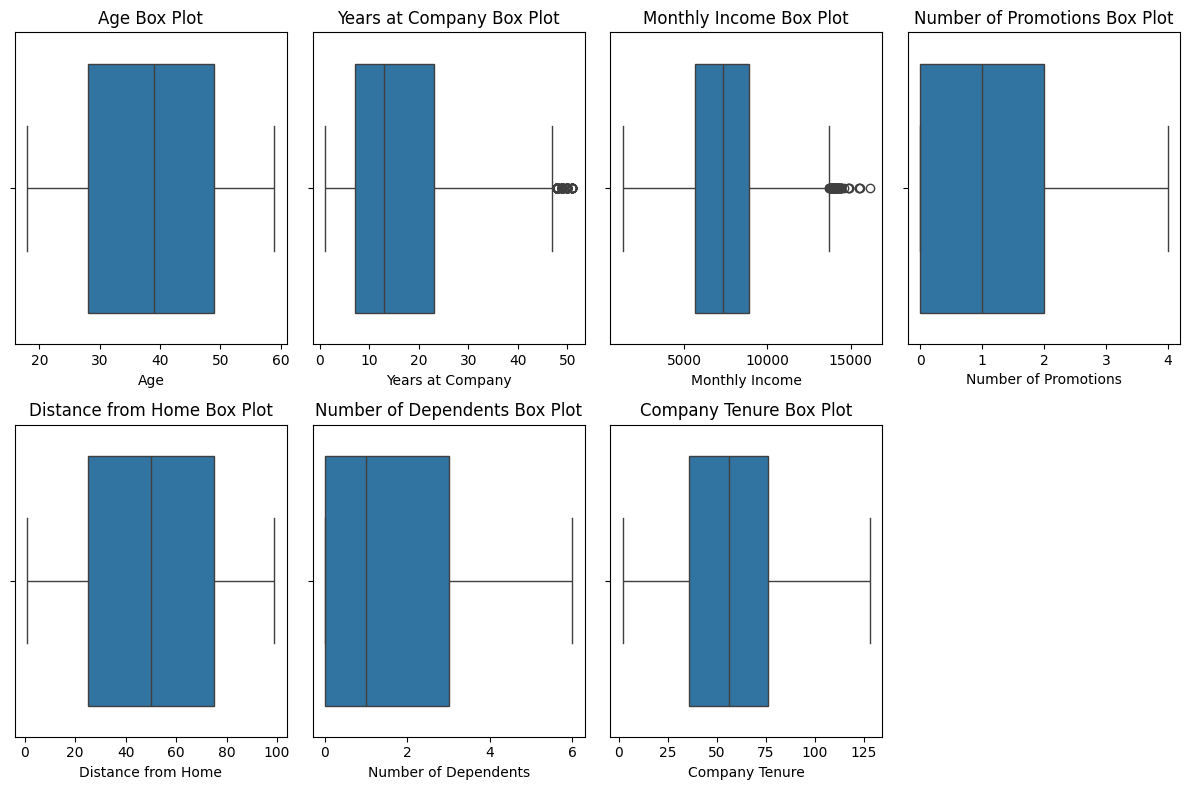

In [21]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Box Plot')
plt.tight_layout()
plt.show()


**categorical variables**

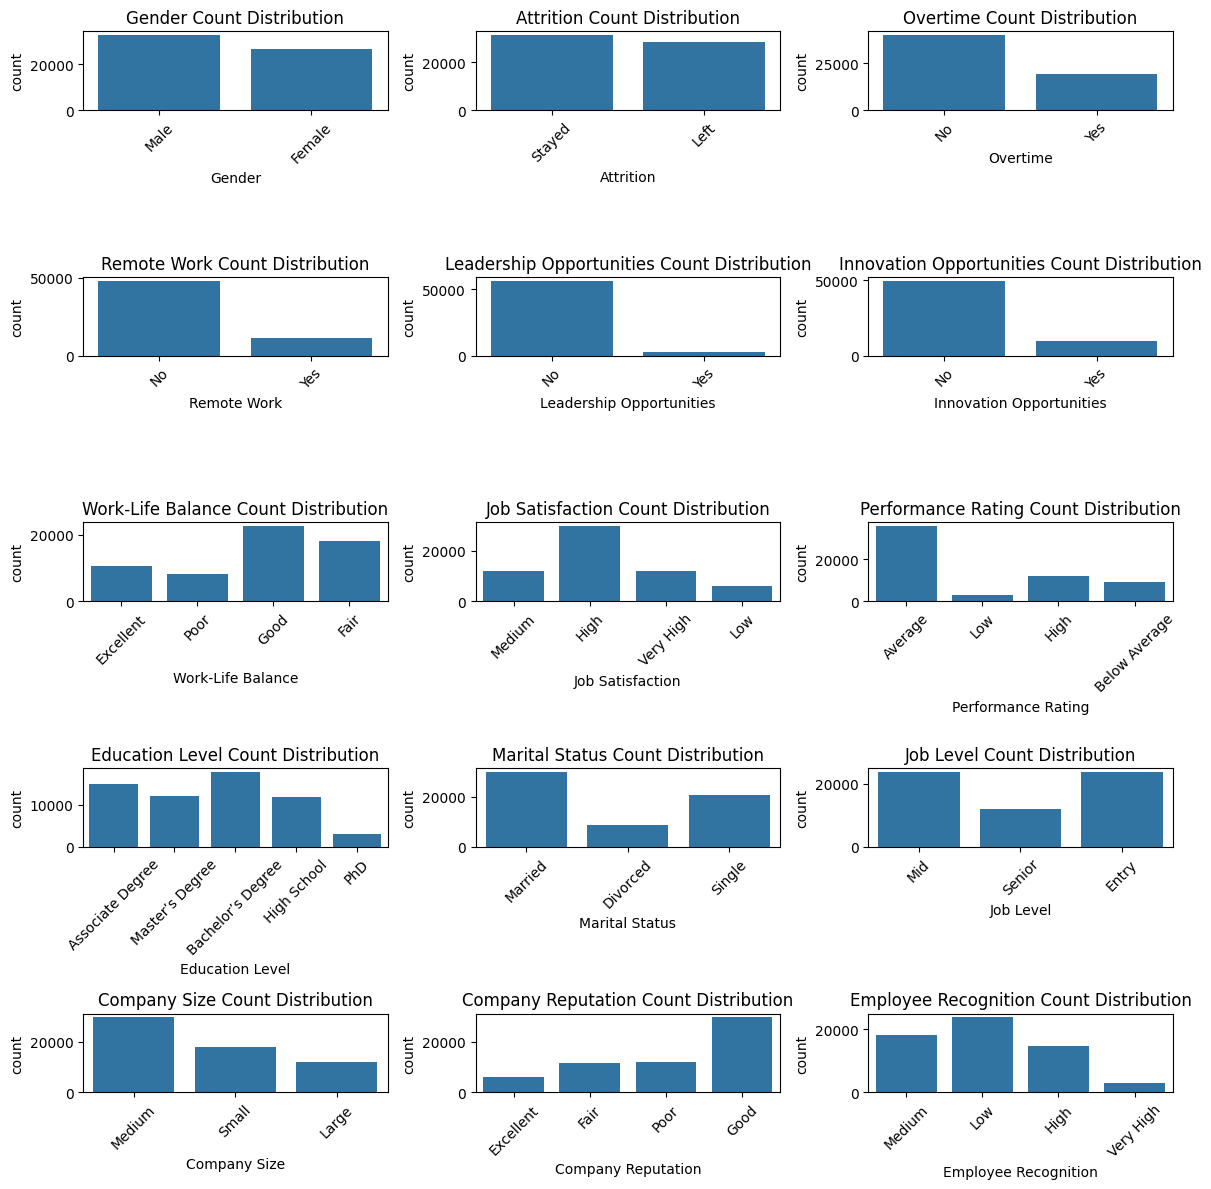

In [13]:
# Countplot for categorical variables
categorical_cols = ['Gender', 'Attrition', 'Overtime', 'Remote Work', 'Leadership Opportunities',
                    'Innovation Opportunities', 'Work-Life Balance', 'Job Satisfaction',
                    'Performance Rating', 'Education Level', 'Marital Status', 'Job Level',
                    'Company Size', 'Company Reputation', 'Employee Recognition']

plt.figure(figsize=(10, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=df[col])
    plt.title(f'{col} Count Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Correlation matrix**

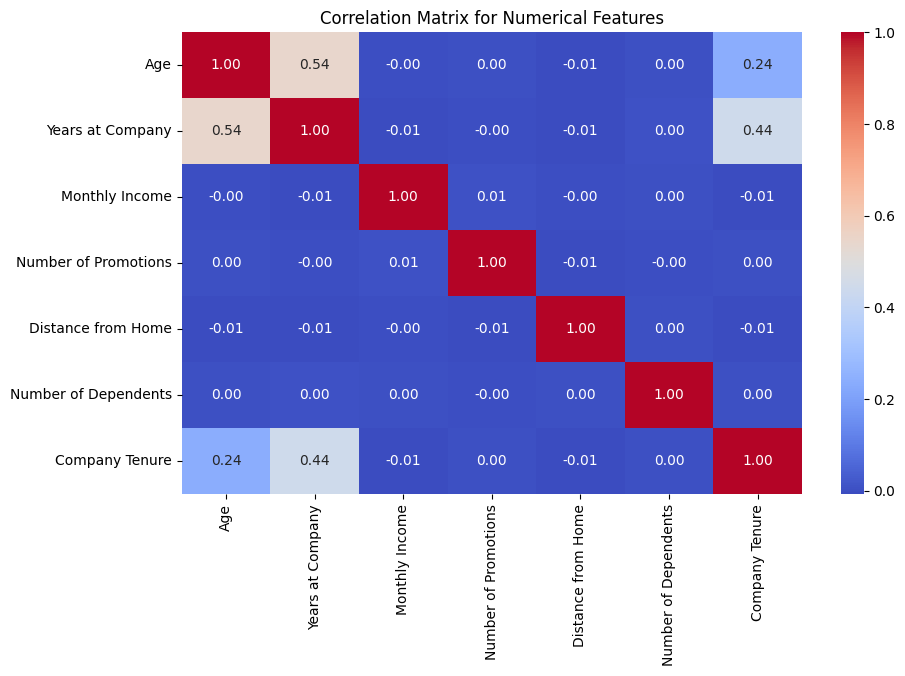

In [19]:
# Correlation matrix to check relationships between numerical features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

**Pair Plot relationship between features**

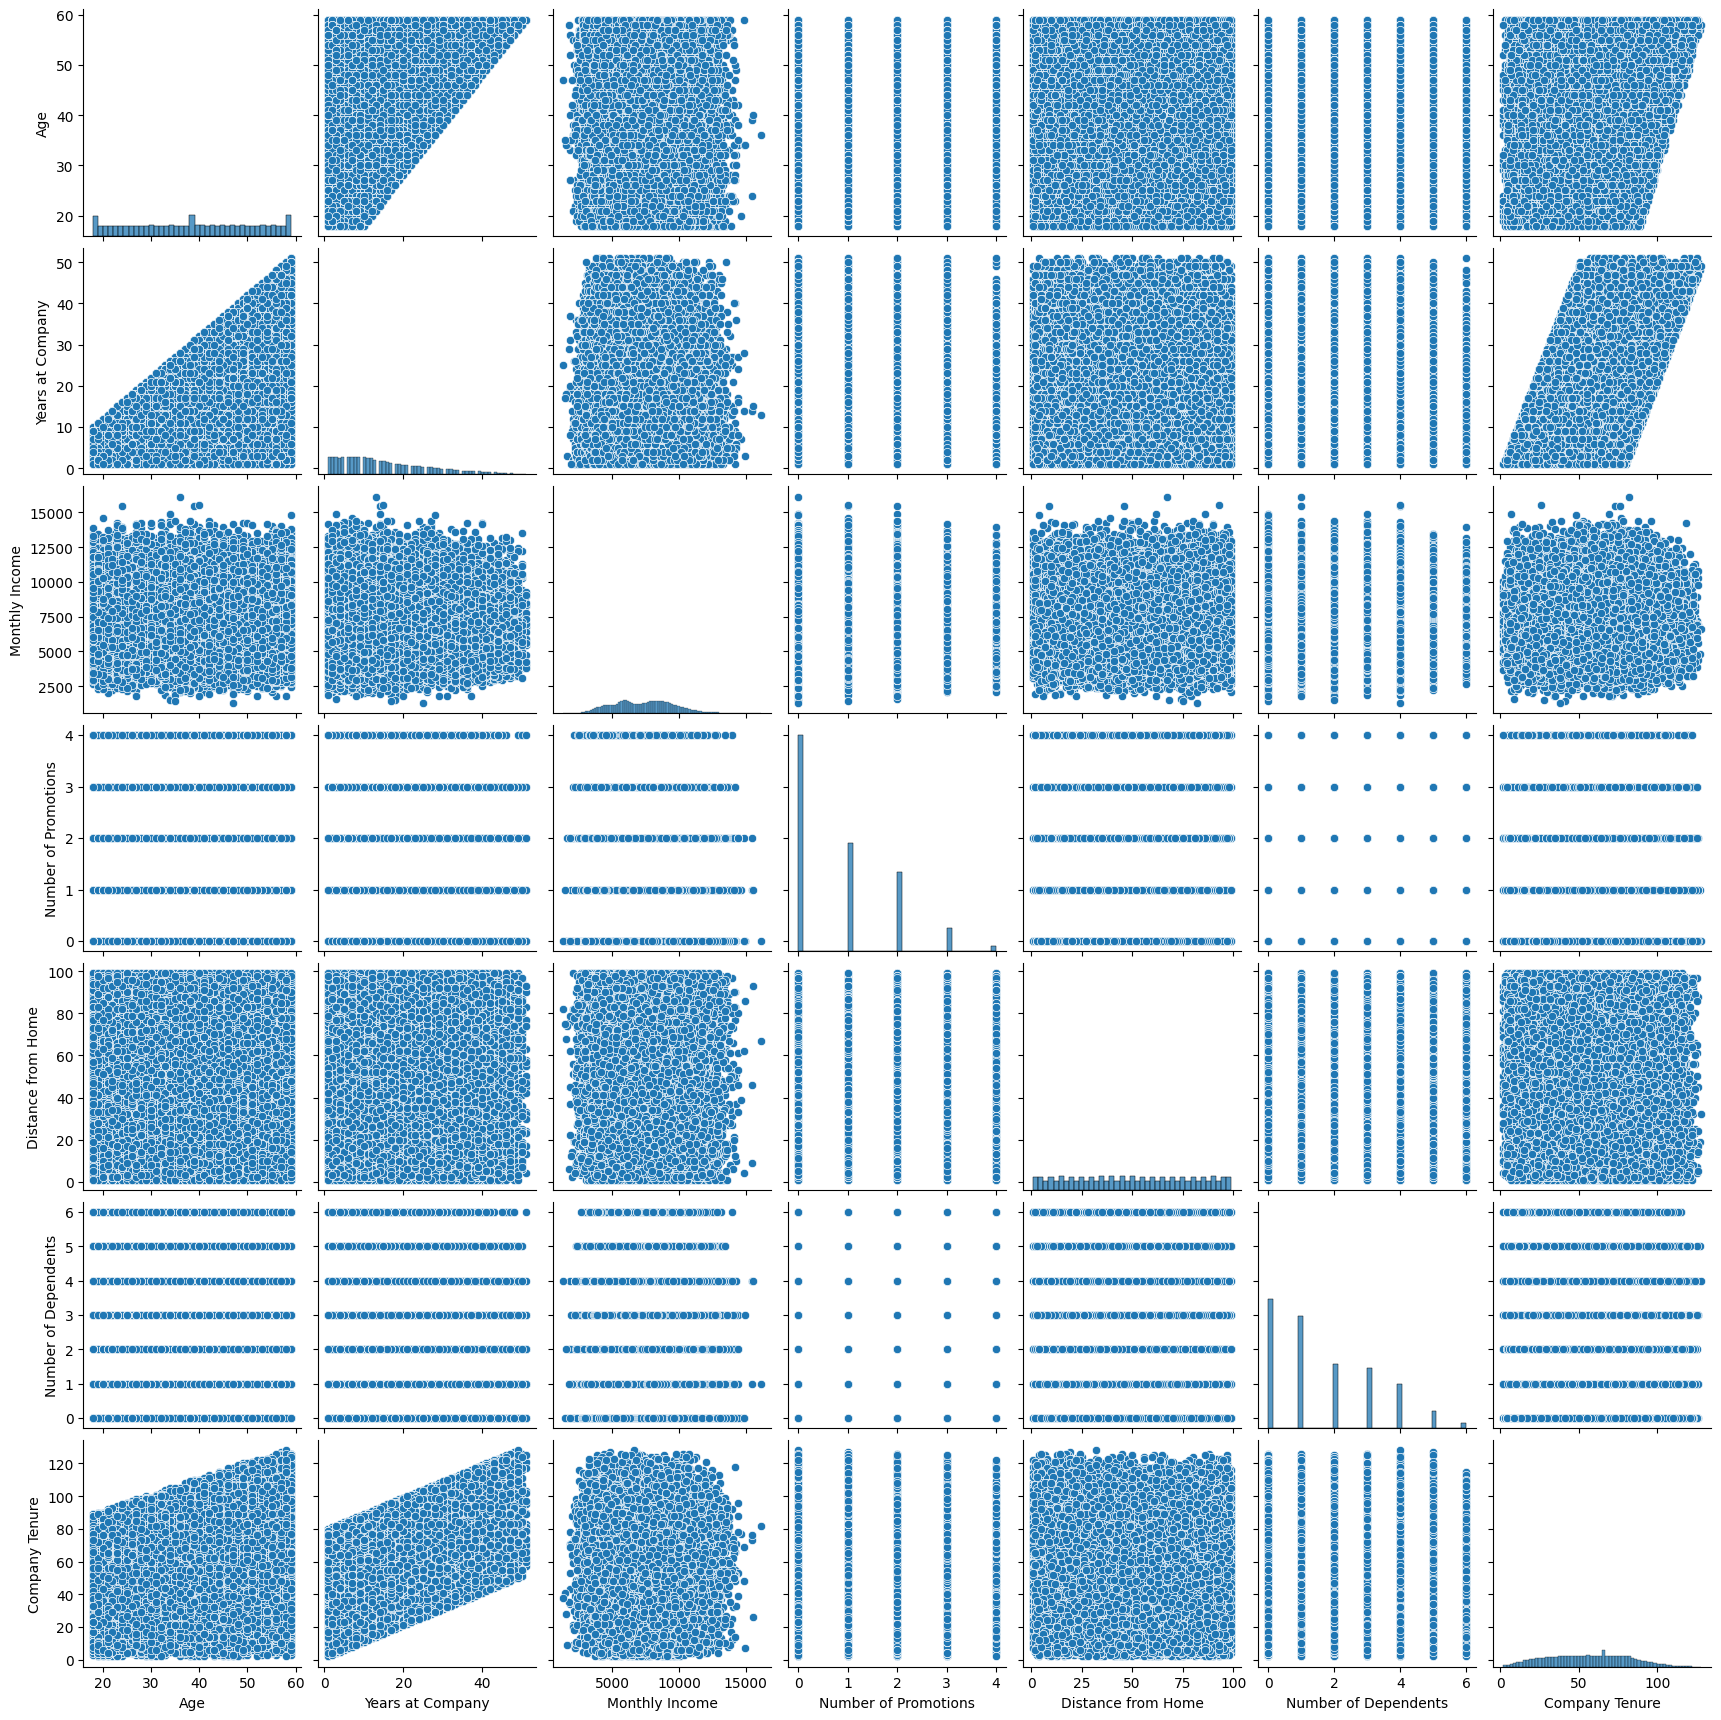

In [20]:
# Visualizing pairwise relationships between features (pairplot)
sns.pairplot(df[numerical_cols])
plt.show()

**Moving Average**<br>
**the numerical columns**

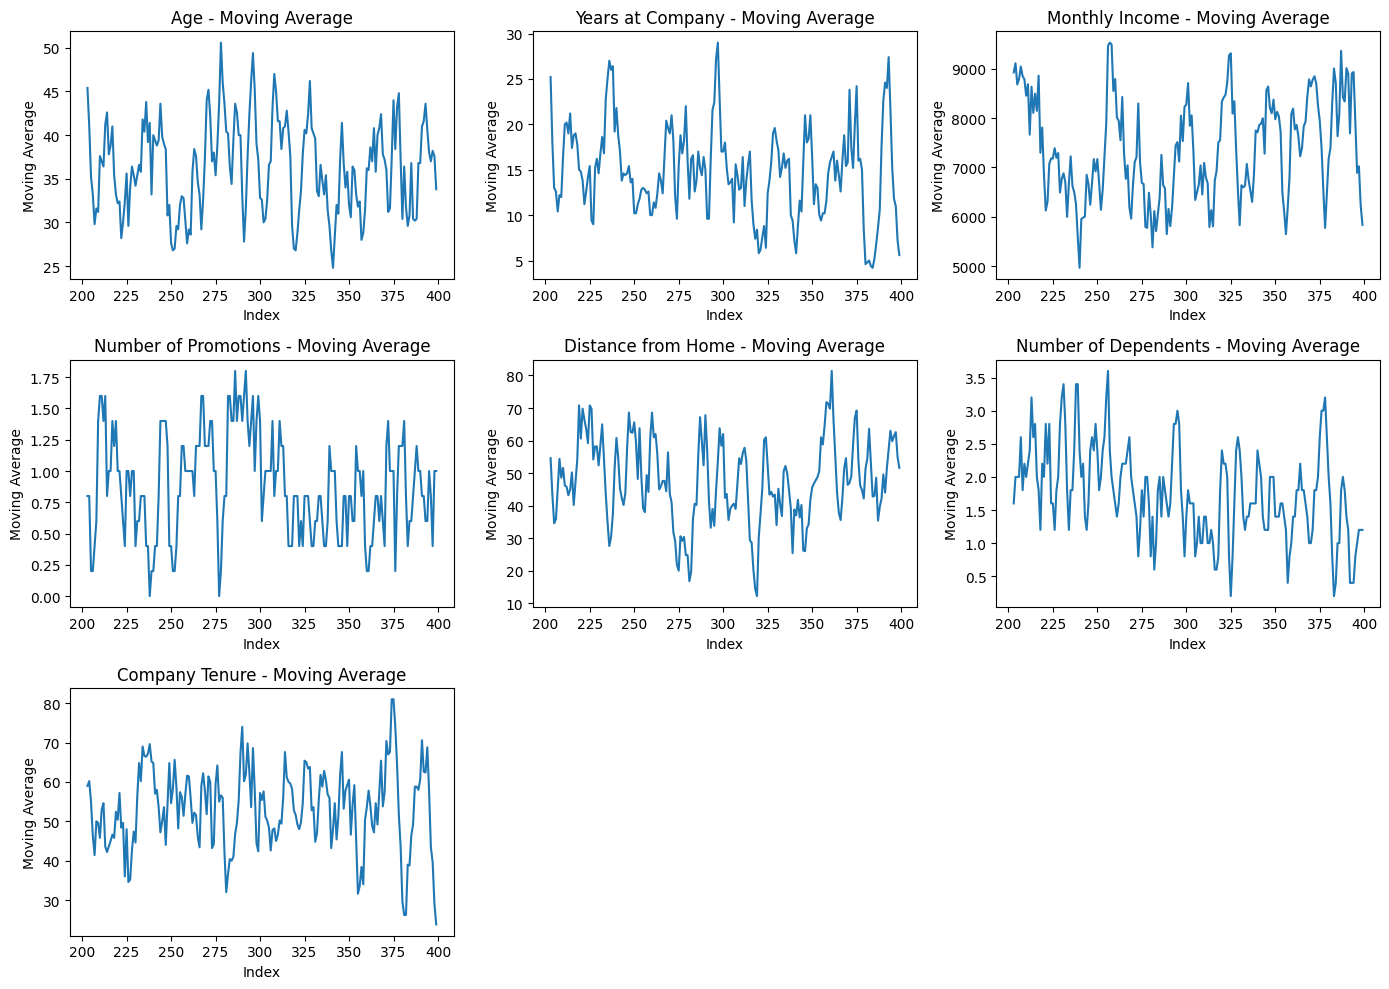

In [15]:
# Extract rows 200 to 400 (Python uses 0-based indexing)
df_sub = df.iloc[199:400]

# Calculate the moving average for the numerical columns
numerical_cols = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
                  'Distance from Home', 'Number of Dependents', 'Company Tenure']

# Apply rolling window (5-point moving average)
moving_avg_df = df_sub[numerical_cols].rolling(window=5).mean()

# Plot the moving average for each numerical feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust subplot layout based on the number of columns
    sns.lineplot(x=moving_avg_df.index, y=moving_avg_df[col])
    plt.title(f'{col} - Moving Average')
    plt.xlabel('Index')
    plt.ylabel('Moving Average')

plt.tight_layout()
plt.show()

**Target variable**

In [24]:
X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

**Randon Forest Model
Trainning and Testing Data for categorial column**

In [29]:

# Label encode binary categorical columns (Gender, Attrition, etc.)
binary_columns = ['Gender', 'Attrition', 'Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
label_encoder = LabelEncoder()

for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

# One-hot encode multi-class categorical columns (e.g., Job Role, Work-Life Balance, etc.)
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop(['Employee ID', 'Attrition'], axis=1)  # Features (remove 'Employee ID' and 'Attrition' column)
y = df['Attrition']  # Target variable (Attrition)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nRandom Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.7415

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      5667
           1       0.76      0.75      0.75      6253

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



**SVM Model Training and Testing**

In [36]:
for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

# One-hot encode multi-class categorical columns
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop(['Employee ID', 'Attrition'], axis=1)  # Features (drop 'Employee ID' and 'Attrition')
y = df['Attrition']  # Target variable (Attrition)


# Feature Scaling (SVM is sensitive to feature magnitudes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' is the default kernel (Gaussian SVM)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

# Print the results
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("\nSVM Classification Report:\n", svm_report)

SVM Accuracy: 0.7456

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      5667
           1       0.76      0.75      0.76      6253

    accuracy                           0.75     11920
   macro avg       0.74      0.75      0.75     11920
weighted avg       0.75      0.75      0.75     11920



Text(120.72222222222221, 0.5, 'Actual')

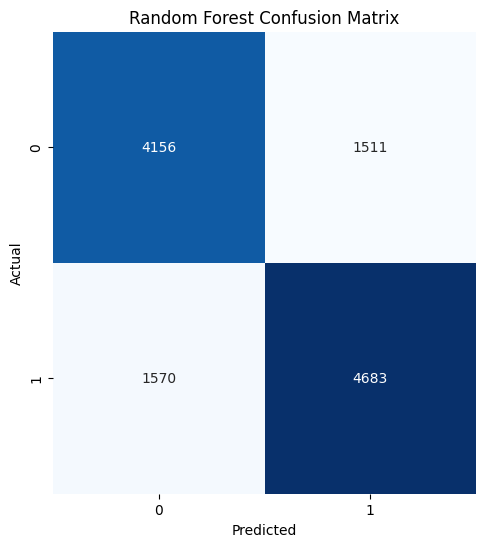

In [37]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(627.9949494949494, 0.5, 'Actual')

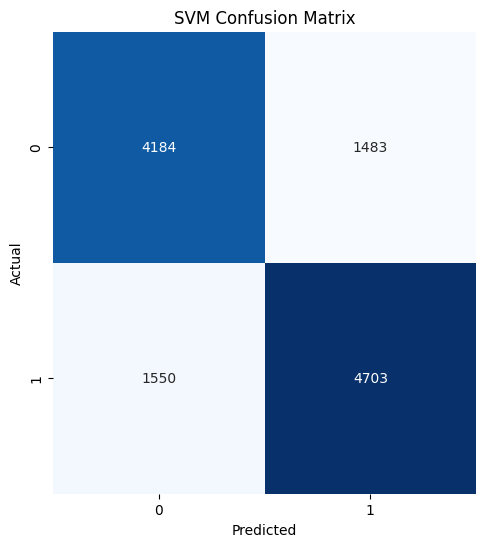

In [38]:
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')